In [1]:
import pyvisa
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime as dt
from matplotlib.animation import FuncAnimation
import time
%matplotlib notebook

In [2]:
rm = pyvisa.ResourceManager()
print(rm.list_resources())
%matplotlib notebook

('ASRL5::INSTR',)


In [3]:
#Let a equal the index (position minus 1) of the power supply from rm.list_resources
a = 0
#This opens the channel without having to rewrite anything printed in the above code
name = ((str(rm.list_resources()).split(",")[a]).replace('(', '')).replace("'", '')
Volt = rm.open_resource(name)

In [4]:
Volt.write("SYSTEM:REM")
Volt.write("APPLY 0,0")
Volt.write("OUTPUT ON")
Volt.write("APPLY 20,2")

(12, <StatusCode.success: 0>)

In [5]:
j = float((Volt.query("APPLY?").split(",")[0]).strip('"'))
print(j)
type(j)
print(Volt.query("APPLY?"))

20.0
"20.000000,2.000000"



In [8]:
tw = 25
wt = 3
Volt.write("APPLY " + str(tw) + "," + str(wt))

(12, <StatusCode.success: 0>)

<IPython.core.display.Javascript object>


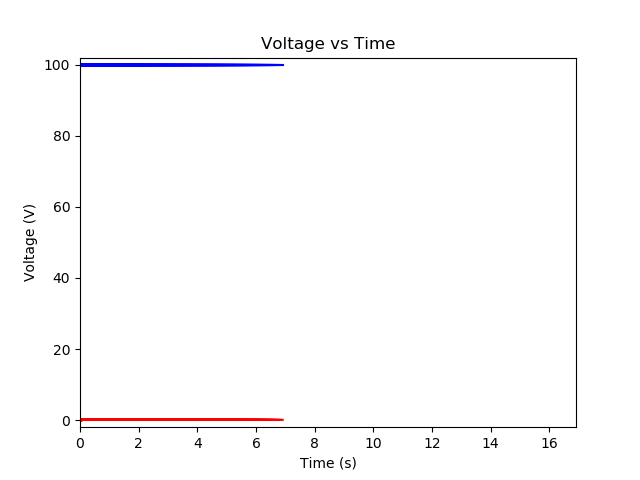

0.07
Total time equals 6.911 seconds


In [7]:
#Make a figure
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

#Define some zeros, empty some sets
i = 1
j = 0
x, y, z, w = [], [], [], []

#Define some constants, including t = 0
graphalivetimeseconds = 50
starttime = time.time()

while i<100:
    #Find the time at the start of each loop - this will be used throughout the loop
    ithtime = time.time() - starttime
    #Get the applied voltage - there's a bit here to clean up the readout
    y.append(float((Volt.query("APPLY?").split(",")[0]).strip('"')))
    #I'm interested in how long a loop takes, this gives the average time after a loop
    z.append(ithtime/i)
    #This line gives the total time since t = 0
    w.append(ithtime)
    
    #Details of the plot
    ax2.plot(w, y, color='b')
    ax2.plot(w, z, color='r')
    #Note that z is the time it tackes to run through a loop, on average
    ax2.set_title('Voltage vs Time')
    ax2.set_ylabel('Voltage (V)')
    ax2.set_xlabel('Time (s)')
    
    #Makes the magic happen
    fig2.canvas.draw()
    #Determines the x axes limits
    ax2.set_xlim(left = max(0, ithtime - graphalivetimeseconds), right = ithtime + 10)
    #Determining the y axes limits is a bit more complicated - I want it to only show the data that's being plotted
    yrecent = y[-102:]
    zrecent = z[-102:]
    #Note that the number (102) in the above two lines is approx graphalivetimeseconds*2.04, rounded to the nearest integer.
    recenttemps = np.concatenate((yrecent, zrecent), axis = 0)
    ymin = np.min(recenttemps)
    ymax = np.max(recenttemps)    
    ax2.set_ylim(bottom = ymin - 2, top = ymax + 2)
    
    i+=1

#This is how many seconds it takes to do one loop, on average:
print(round(z[-1], 3))
print("Total time equals " + str(round(w[-1], 3)) + " seconds")

In [9]:
Volt.write("APPLY 0,0")
Volt.write("OUTPUT OFF")
Volt.write("SYSTEM:LOC")

(12, <StatusCode.success: 0>)

In [10]:
Volt.close()

In [51]:
o = np.random.random()
if o < 0.5:
    v = 0
    del v
else:
    v = o
try:
    print(v)
except:
    print("An exception occurred")

0.9718136980404712


In [52]:
total = 0
for i, j in range(1,9):
    if i % 3 == 0:
        total = total + i + j
    else:
        pass
print(total)

TypeError: cannot unpack non-iterable int object

In [53]:
mylist = ["a", "b", "c", "d"]
myliste = enumerate(mylist)
print(myliste)

In [54]:
# Python program to illustrate 
# enumerate function in loops 
l1 = ["eat","sleep","repeat"] 
  
# printing the tuples in object directly 
for ele in enumerate(l1): 
    print(ele)
# changing index and printing separately 
for count,ele in enumerate(l1,100): 
    print(count,ele)

(0, 'eat')
(1, 'sleep')
(2, 'repeat')
100 eat
101 sleep
102 repeat


In [55]:
channels = ["voltage", "current"]
for ch in channels:
    if ch == "voltage":
        print(ch)
    else:
        pass

voltage


In [13]:
string = "1,\s27.125,\s23.75\r\n"
before, sep, after = string.rpartition("s")
print(before)
print(sep)
print(after)

before1, sep1, after1 = before.rpartition("s")
print(before1)
print(sep1)
print(after1)

print(string.rpartition("s")[2])

1,\s27.125,\
s
23.75

1,\
s
27.125,\
23.75

